# 1. 문제 정의

<!-- * 문제 상황 : 축구 선수가 꿈인 디미는 자신이 어느 축구 포지션에 가장 적합한 능력을 갖고 있는지 궁금하다. -->
* 문제 상황 : 동물 맞추기 퀴즈 대회를 진행중인 도훈이는 해당 동물의 특성을 듣고 빠르게 맞춰야 한다.

<!-- * 문제 정의 : 실제 축구 선수들이 가진 능력치를 바탕으로 디미에게 가장 적합한 축구 포지션을 추천해 주자. -->
* 문제 정의 : 실제 동물들의 특징을 바탕으로 동물의 종과 이름을 맞춰보자.

# 2. 데이터 수집

<!-- * 데이터 수집 출처 : [FIFA22 OFFICIAL DATASET](https://www.kaggle.com/bryanb/fifa-player-stats-database) -->
* 데이터 수집 출처 : [Zoo Animal Classification](https://www.kaggle.com/uciml/zoo-animal-classification)

<!-- * 파일명 : FIFA22_official_data.csv -->
* 파일명 : zoo.csv

* 독립변수 : 16개

  * hair : 머리털 존재 여부
  * feathers : 깃털 존재 여부
  * ..
  * catsize : 고양이와 비교했을 때 크기 여부

* 종속변수 : animal_name, class_type

In [98]:
# 데이터 가져오기
import numpy as np
import pandas as pd

df = pd.read_csv('./dataset/zoo.csv')
df.shape

(101, 18)

In [99]:
# 열 정보 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


# 3. 데이터 전처리

* 결측치 확인 후 처리하기

* 불필요한 속성 삭제하기

* 범주형 데이터를 숫자형 데이터로 변환하기

* 특성 스케일링하기

In [100]:
# 결측치 갯수 알아보기
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [101]:
# 결측치 삭제하기
df.dropna(inplace=True)
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [102]:
# class_type 에 해당하는 종 이름 컬럼 생성하기
class_type = {1:"Mammal",2:"Bird",3:"Reptile",4:"Fish",5:"Amphibian",6:"Bug",7:"Invertebrate"}
df['class_type_name'] = df['class_type'].map(class_type)
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class_type_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,Mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate


# 4. 데이터 탐색 및 시각화

In [103]:
# 수집된 개체 수 확인하기
df['animal_name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal_name, Length: 100, dtype: int64

In [104]:
# class_type_name 별 개체 수 확인하기
df['class_type_name'].value_counts()

Mammal          41
Bird            20
Fish            13
Invertebrate    10
Bug              8
Reptile          5
Amphibian        4
Name: class_type_name, dtype: int64

<AxesSubplot:xlabel='class_type_name', ylabel='count'>

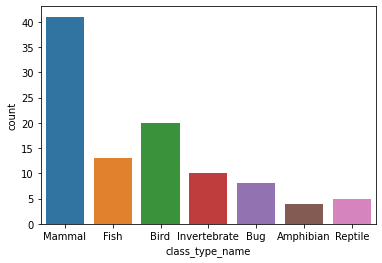

In [105]:
# class_type_name 별 데이터 건수 확인하기
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='class_type_name', data=df)

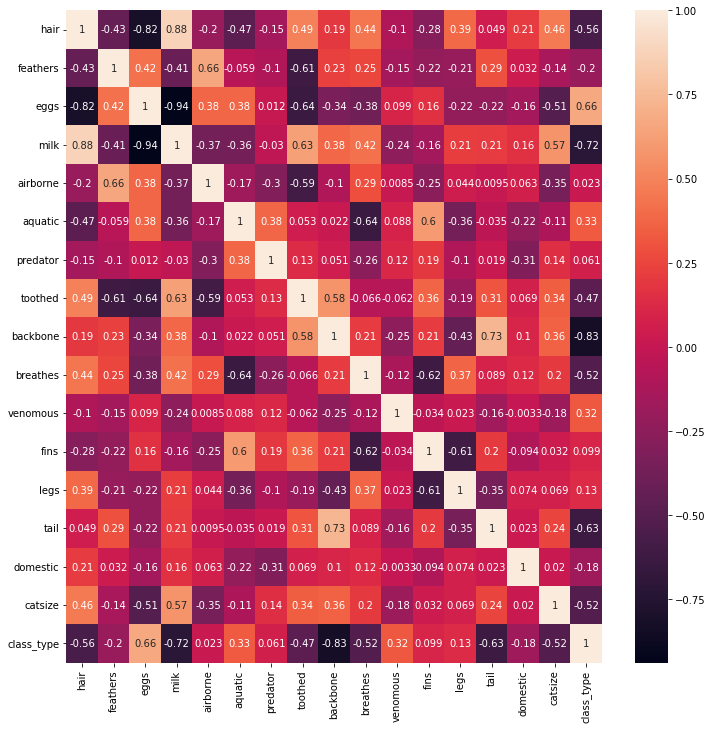

In [106]:
# 특성별 상관관계 보기
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# 5. 모델 학습 및 평가

* 머신러닝 알고리즘 선택 : 결정트리, 랜덤포레스트

* 학습 후 특성 중요도 확인하기

* 분류 모델 평가 지표 : 정확도(Accuracy)

In [107]:
# 데이터 분리하기
from sklearn.model_selection import train_test_split

X_data = df.drop(['class_type','class_type_name','animal_name'], axis=1).to_numpy()  # to_numpy()를 안해주면 y_test 데이터가 Series로 리턴됨
y_data = df['class_type'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 16), (21, 16), (80,), (21,))

In [108]:
# 사이킷런 알고리즘 import하기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [109]:
# Decision Tree로 학습 후 평가하기
dt = DecisionTreeClassifier(random_state=3)

dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.9523809523809523


In [110]:
# Decision Tree 과대적합 막기
params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [4,5,6]
}
dt = DecisionTreeClassifier(random_state=3)

gs = GridSearchCV(dt, param_grid=params, n_jobs=-1)

gs.fit(X_train, y_train)

print('best parameter:', gs.best_params_)
print('best score:', gs.best_score_)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


best parameter: {'max_depth': 6, 'min_samples_split': 4}
best score: 0.95
0.975
0.9523809523809523


In [111]:
# Random Forest로 학습 후 평가하기
rf = RandomForestClassifier(random_state=3)

gs2 = GridSearchCV(rf, param_grid=params, n_jobs=-1)

gs2.fit(X_train, y_train)
 
print('best parameter:', gs2.best_params_)
print('best score:', gs2.best_score_)
print(gs2.score(X_train, y_train))
print(gs2.score(X_test, y_test))

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


best parameter: {'max_depth': 8, 'min_samples_split': 4}
best score: 0.975
1.0
0.9523809523809523


<AxesSubplot:xlabel='importance', ylabel='feature_name'>

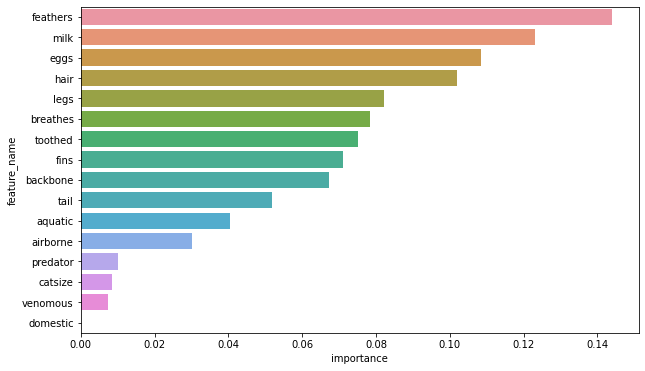

In [112]:
# 특성 중요도 시각화하기
df2 = pd.DataFrame({
    'feature_name' : df.columns[1:17],
    'importance' : gs2.best_estimator_.feature_importances_
})

df2 = df2.sort_values(by=['importance'], ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=df2['feature_name'], x=df2['importance'])

# 6. 모델 개선

* 개선1 : 중요한 특성 10개만 골라서 학습시키기 -> 큰 변화가 존재하지 않음

* 개선2 : 하이퍼 파라미터 튜닝하기 -> score가 1.0 으로 증가

In [113]:
# 개선1 : 중요한 특성 10개만 고르기
X_data_new = df[['milk', 'feathers', 'eggs', 'hair', 'toothed', 'legs', 'fins', 'breathes', 'backbone', 'tail']].to_numpy()
y_data_new = df['class_type'].to_numpy()

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_data_new, y_data_new, test_size=0.2, random_state=42)
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((80, 10), (21, 10), (80,), (21,))

In [114]:
# Random Forest로 학습 후 평가하기
rf = RandomForestClassifier(random_state=3)

params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [4,5,6]
}
gs2 = GridSearchCV(rf, param_grid=params, n_jobs=-1)

gs2.fit(X_train_new, y_train_new)
 
print('best parameter:', gs2.best_params_)
print('best score:', gs2.best_score_)
print(gs2.score(X_train_new, y_train_new))
print(gs2.score(X_test_new, y_test_new))

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


best parameter: {'max_depth': 6, 'min_samples_split': 4}
best score: 0.9625
0.9875
0.9523809523809523


In [115]:
# 개선2 : 랜덤 포레스트 하이퍼 파라미터 튜닝하기
X_data_new = df.drop(['class_type','class_type_name','animal_name'], axis=1).to_numpy()
y_data_new = df['class_type'].to_numpy()

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_data_new, y_data_new, test_size=0.2, random_state=42)
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((80, 16), (21, 16), (80,), (21,))

In [116]:
# Random Forest로 학습 후 평가하기
rf = RandomForestClassifier(random_state=3)

params = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [4,5,6],
    'n_estimators': [10, 15, 20],
    'max_features': [10, 13, 16]
}

gs2 = GridSearchCV(rf, param_grid=params, n_jobs=-1)

gs2.fit(X_train_new, y_train_new)
 
print('best parameter:', gs2.best_params_)
print('best score:', gs2.best_score_)
print(gs2.score(X_train_new, y_train_new))
print(gs2.score(X_test_new, y_test_new))

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


best parameter: {'max_depth': 6, 'max_features': 10, 'min_samples_split': 4, 'n_estimators': 15}
best score: 0.9875
0.9875
1.0


# 7. 문제 해결

* 퀴즈에 출제된 동물의 특징을 예측한 결과 동물의 종이 ~~류이고, ~~~라는 예측 결과가 나옴

In [117]:
# 동물 특성을 입력하여 동물의 종과 이름 예측하기
estimator = gs2.best_estimator_
predict_name = list()
def predict_animal(testset):
       result = pd.Series(estimator.predict(testset)).map(class_type)
       for target in testset:
              predict_name.append(df[df.apply(lambda x: (x['hair':'catsize'] == target).all(), axis=1)]['animal_name'].to_numpy())
       
       return (result.to_numpy(), predict_name)

print(predict_animal([[0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0]]))


(array(['Fish'], dtype=object), [array(['haddock', 'seahorse', 'sole'], dtype=object)])


# 8. 평가

* 프로젝트를 통해 배운 점, 아쉬운 점 등을 작성합니다.

오랜만에 해보는 머신러닝이라 어려웠지만, 수업이 정말 알차서 수월하게 진행할 수 있었다. 